# Global Entrepreneurship Monitor (GEM)

## Entrepreneurial Behavior and Attitudes
The Adult Population Survey (APS) looks at the characteristics, motivations and ambitions of individuals starting businesses, as well as social attitudes towards entrepreneurship.

### Definitions
Entrepreneurial Behaviour and Attitudes indicators measured via the Adult Population Survey (APS):

- **Perceived Opportunities Rate (OPPOR)**: Percentage of 18-64 population (individuals involved in any stage of entrepreneurial activity excluded) who see good opportunities to start a firm in the area where they live

- **Perceived Capabilities Rate (SUSKL)**: Percentage of 18-64 population (individuals involved in any stage of entrepreneurial activity excluded) who believe they have the required skills and knowledge to start a business

- **Fear of Failure Rate (FFAIL)**: Percentage of 18-64 population (individuals involved in any stage of entrepreneurial activity excluded) who indicate that fear of failure would prevent them from setting up a business

- **Entrepreneurial Intentions Rate**: Percentage of 18-64 population (individuals involved in any stage of entrepreneurial activity excluded) who are latent entrepreneurs and who intend to start a business within three years

- **Total early-stage Entrepreneurial Activity (TEA) Rate**: Percentage of 18-64 population who are either a nascent entrepreneur or owner-manager of a new business

- **Established Business Ownership Rate**: Percentage of 18-64 population who are currently an owner-manager of an established business, i.e., owning and managing a running business that has paid salaries, wages, or any other payments to the owners for more than 42 months

- **Entrepreneurial Employee Activity Rate**: Rate of involvement of employees in entrepreneurial activities, such as developing or launching new goods or services, or setting up a new business unit, a new establishment or subsidiary

- **Motivational Index**: Percentage of those involved in TEA that are improvement-driven opportunity motivated, divided by the percentage of TEA that is necessity-motivated

- **Female/Male TEA Ratio**: Percentage of female 18-64 population who are either a nascent entrepreneur or owner-manager of a 'new business', divided by the equivalent percentage for their male counterparts

- **Female/Male Opportunity-Driven TEA Ratio**: Percentage of those females involved in TEA who (i) claim to be driven by opportunity as opposed to finding no other option for work; and (ii) who indicate the main driver for being involved in this opportunity is being independent or increasing their income, rather than just maintaining their income, divided by the equivalent percentage for their male counterparts

- **High Job Creation Expectation Rate**: Percentage of those involved in TEA who expect to create 6 or more jobs in 5 years

- **Innovation Rate**: Percentage of those involved in TEA who indicate that their product or service is new to at least some customers AND that few/no businesses offer the same product

- **Business Services Sector Rate**: Percentage of those involved in TEA in the 'Business Services' sector - Information and Communication, Financial Intermediation and Real Estate, Professional Services or Administrative Services, as defined by the ISIC 4.0 Business Type Codebook

- **High Status to Successful Entrepreneurs Rate**: Percentage of 18-64 population who agree with the statement that in their country, successful entrepreneurs receive high status

- **Entrepreneurship as a Good Career Choice Rate**: Percentage of 18-64 population who agree with the statement that in their country, most people consider starting a business as a desirable career choice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/GEM/GEM 2017 APS Global National Level Data_27Oct.xlsx')

In [3]:
df.shape

(54, 194)

In [4]:
df.head(3)

,country,country_name,region,ctryalp,CAT_GCR1,CAT_GCR2,Bstart17,Bjobst17,Ownmge17,Busang17,...,TEAexpwk,BAFUNDUS,COUNTBAF,COUNTBUS,BUSANGVL,BUSANGVLWT,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
0,1,USA,North America,US,5,3,16.484463,8.929930,19.643626,6.740430,...,86.441637,20243.118280,93,95,5.230596,5.257400,7.587636,10.977426,6.341433,9.174480
1,20,Egypt,Africa,EG,3,2,30.558540,21.104014,16.698833,3.766109,...,30.520236,5090.341288,88,88,3.490678,3.549859,2.176354,4.434803,1.695146,3.454236
2,27,South Africa,Africa,ZA,3,2,16.908842,7.316289,10.483170,2.747753,...,62.537307,1610.132465,47,52,1.584507,1.476898,0.453279,1.276094,0.328499,0.917118


In [5]:
list(df.columns)

['country',
 'country_name',
 'region',
 'ctryalp',
 'CAT_GCR1',
 'CAT_GCR2',
 'Bstart17',
 'Bjobst17',
 'Ownmge17',
 'Busang17',
 'Futsup17',
 'Disent17',
 'Exitct17',
 'Knoent17',
 'Opport17',
 'Suskil17',
 'Frfail17',
 'Knoen17m',
 'Knoen17f',
 'Oppor17m',
 'Oppor17f',
 'Suskl17m',
 'Suskl17f',
 'Ffail17m',
 'Ffail17f',
 'Equali17',
 'NBgood17',
 'NBstat17',
 'NBmedi17',
 'Sub17',
 'Subo17',
 'Suboa17',
 'Suboan17',
 'Babybu17',
 'Estbbu17',
 'Anybus17',
 'BO_17ina',
 'BO_17exa',
 'TEA17',
 'TEA17mal',
 'TEA17fem',
 'EB_17mal',
 'EB_17fem',
 'TEA17opp',
 'TEA17nec',
 'TEA17mop',
 'TEA17fop',
 'TEA17mne',
 'TEA17fne',
 'TEA17ido',
 'TEA17MT1',
 'TEA17MT2',
 'TEA17MT3',
 'TEA17MT4',
 'SUBOPP17',
 'SUBNEC17',
 'Sample17',
 'SU_ct17',
 'BB_ct17',
 'EB_ct17',
 'TEAct17',
 'BA_ct17',
 'DISCct17',
 'SU_17tmz',
 'BB_17tmz',
 'EB_17tmz',
 'TEA17tmz',
 'Tea17s1p',
 'Tea17s2p',
 'Tea17s3p',
 'Tea17s4p',
 'EB_17s1p',
 'EB_17s2p',
 'EB_17s3p',
 'EB_17s4p',
 'TEA17mk1',
 'TEA17mk2',
 'TEA17mk3',


In [6]:
selected_cols = ['Oppor17m', 'Oppor17f', 'Suskl17m', 'Suskl17f', 'Ffail17m', 'Ffail17f']

In [7]:
# TEA_cols = ['TEA17mal']

`CAT_GCR1` is Country Group Global Competitiveness Report 5 categories, where countries with higher score are also in catgeory 5.

In [8]:
for i in range(1,6):
    print(i, list(df[df['CAT_GCR1']==i]['country_name']))

1 ['India', 'Madagascar']
2 ['Vietnam', 'Kazakhstan']
3 ['Egypt', 'South Africa', 'Peru', 'Mexico', 'Brazil', 'Colombia', 'Indonesia', 'Thailand', 'China', 'Iran', 'Morocco', 'Bulgaria', 'Bosnia and Herzegovina', 'Guatemala', 'Ecuador']
4 ['Poland', 'Argentina', 'Chile', 'Malaysia', 'Latvia', 'Croatia', 'Slovakia', 'Panama', 'Uruguay', 'Lebanon', 'Saudi Arabia']
5 ['USA', 'Greece', 'Netherlands', 'France', 'Spain', 'Italy', 'Switzerland', 'United Kingdom', 'Sweden', 'Germany', 'Australia', 'Japan', 'Korea', 'Canada', 'Luxembourg', 'Ireland', 'Cyprus', 'Estonia', 'Slovenia', 'Puerto Rico', 'Taiwan', 'United Arab Emirates', 'Israel', 'Qatar']


`region` is a column I manually added for analysis purpose.

Australia and Sweden is grouped in `Western Europe`, Mexico is grouped along with Central American countries to `South America`, Kazakhstan and India are not in a group name because there is only one country in their region, and China is also singled out because it has a different sociopolitical structure than rest of East Asia and also because it has a much lower GCR.

In [20]:
df['region'].value_counts()

South America      11
Western Europe      9
Eastern Europe      8
Middle East         7
Southeast Asia      4
Africa              4
Southern Europe     3
East Asia           3
North America       2
China               1
Kazakhstan          1
India               1
Name: region, dtype: int64

In [9]:
selected_df = df[['country_name', 'region', 'CAT_GCR1'] + selected_cols]

## by Global Competitiveness Report

In [10]:
selected_groupby = selected_df.groupby('CAT_GCR1').mean()
selected_groupby

,Oppor17m,Oppor17f,Suskl17m,Suskl17f,Ffail17m,Ffail17f
CAT_GCR1,,,,,,
1,36.822515,32.297805,51.648594,45.582274,39.239930,35.485326
2,46.808634,49.831350,59.488301,58.276190,36.933558,37.376995
3,43.305460,39.130800,57.427330,46.308748,35.885384,42.794266
4,48.504685,45.839482,60.630291,50.961613,35.458761,42.099101
5,46.079694,40.885667,49.593656,36.294615,40.227262,46.198011


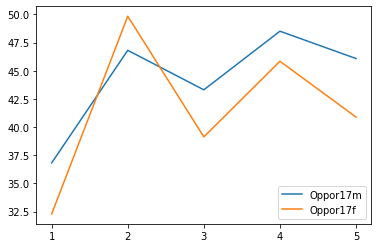

In [12]:
OPPOR_cols = ['Oppor17m', 'Oppor17f']
plt.plot(selected_groupby[OPPOR_cols])
plt.legend(OPPOR_cols)
plt.xticks(np.arange(1,6))
plt.show()

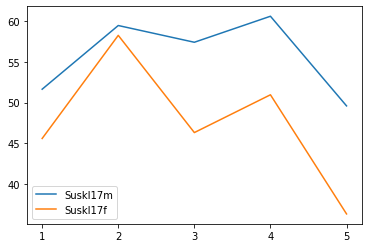

In [26]:
SUSKLL_cols = ['Suskl17m', 'Suskl17f']
plt.plot(selected_groupby[SUSKLL_cols])
plt.legend(SUSKLL_cols)
plt.xticks(np.arange(1,6))
plt.show()

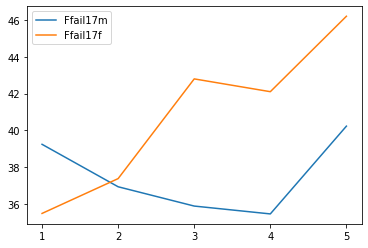

In [14]:
FFAIL_cols = ['Ffail17m', 'Ffail17f']
plt.plot(selected_groupby[FFAIL_cols])
plt.legend(FFAIL_cols)
plt.xticks(np.arange(1,6))
plt.show()

## by region

In [15]:
selected_groupby_region = selected_df.groupby('region').mean().sort_values(by='CAT_GCR1')
selected_groupby_region

,CAT_GCR1,Oppor17m,Oppor17f,Suskl17m,Suskl17f,Ffail17m,Ffail17f
region,,,,,,,
India,1.000000,48.162672,41.295490,47.582741,36.050157,36.094271,32.881278
Kazakhstan,2.000000,47.047797,53.416788,65.763087,63.697818,20.353223,18.590413
Africa,2.500000,41.302195,32.900257,55.611339,40.192160,38.321643,42.803371
China,3.000000,35.695696,34.694300,29.704145,24.706594,38.104153,43.324896
Southeast Asia,3.000000,47.716812,46.437609,53.303245,49.325222,51.037431,54.725045
South America,3.545455,46.750714,43.197425,63.402400,54.490280,29.803285,36.368914
Eastern Europe,4.000000,38.071325,35.148385,52.853196,41.581828,36.128498,44.527143
Middle East,4.428571,52.305016,52.246701,61.057729,51.553248,44.201991,47.847472
East Asia,5.000000,23.605931,22.555996,34.436228,20.452024,38.249743,40.906831


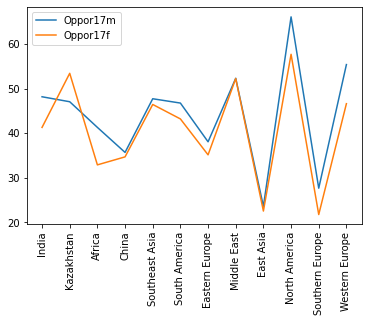

In [16]:
OPPOR_cols = ['Oppor17m', 'Oppor17f']
plt.plot(selected_groupby_region[OPPOR_cols])
plt.legend(OPPOR_cols)
plt.xticks(rotation=90)
plt.show()

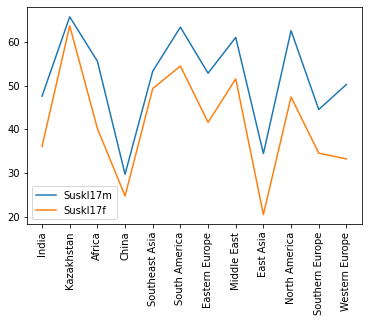

In [18]:
SUSKLL_cols = ['Suskl17m', 'Suskl17f']
plt.plot(selected_groupby_region[SUSKLL_cols])
plt.legend(SUSKLL_cols)
plt.xticks(rotation=90)
plt.show()

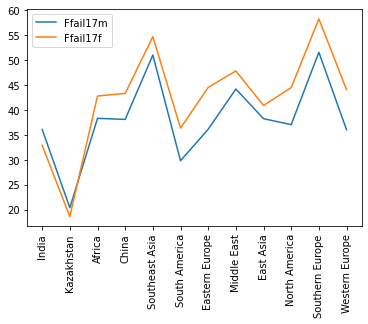

In [19]:
FFAIL_cols = ['Ffail17m', 'Ffail17f']
plt.plot(selected_groupby_region[FFAIL_cols])
plt.legend(FFAIL_cols)
plt.xticks(rotation=90)
plt.show()